In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import math
import seaborn as sns
import sklearn as sk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Merging Operations**

In [ ]:
path = "/content/drive/Shareddrives/Valorant114/Valorant Earnings.csv"
ValEar = pd.read_csv(path)
ValEar = ValEar.rename(columns = {'Unnamed: 0': 'PName'})
ValEar

# Import the csv file containing the amount of money earned by the top 1000 earners in Valorant and rename one poorly named column to a more workable one

,PName,Has nationality,Has earnings,Has id
0,Crashies,United States,"153,650",crashies
1,Victor,United States,"152,650",Victor
2,FNS,Canada,"151,520",FNS
3,Marved,Canada,"150,550",Marved
4,Yay,United States,"142,500",yay
...,...,...,...,...
995,Teddy,United States,"3,293",Teddy
996,Payen,United States,"3,290",payen
997,Isla,Brazil,"3,287",isla
998,Tyler,United States,"3,285",Tyler


In [ ]:
names = (ValEar['PName'].values).tolist()
smalladder = [x.lower() for x in names]
ValEar['PlayerID'] = smalladder
ValEar

# Converts all names of players to all lowercase in order to prepare for the merge operation later

,PName,Has nationality,Has earnings,Has id,PlayerID
0,Crashies,United States,"153,650",crashies,crashies
1,Victor,United States,"152,650",Victor,victor
2,FNS,Canada,"151,520",FNS,fns
3,Marved,Canada,"150,550",Marved,marved
4,Yay,United States,"142,500",yay,yay
...,...,...,...,...,...
995,Teddy,United States,"3,293",Teddy,teddy
996,Payen,United States,"3,290",payen,payen
997,Isla,Brazil,"3,287",isla,isla
998,Tyler,United States,"3,285",Tyler,tyler


In [ ]:
path = "/content/drive/Shareddrives/Valorant114/ValStat.csv"
ValStat0 = pd.read_csv(path)

In [ ]:
ValStat1 = ValStat0.drop(columns=['R', 'K', 'D', 'A', 'FK', 'FD'])
ValStat1
ValStat1.isna().any()

# Import the csv containing all the player statistics for all professional valorant players over their entire career, and then dropped irrelevant columns or redundant columns

,PLAYER,AGENTS,RND,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,KMAX
0,byrf,NaN,801.0,211.8,1.18,77%,136.5,0.73,0.36,0.07,0.06,26%,8%,27.0
1,INF,(+1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,keenc,NaN,924.0,277.3,1.53,78%,175.2,0.99,0.19,0.19,0.09,19%,16%,33.0
3,GX3,(+5),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,enerii,NaN,1810.0,300.0,1.41,76%,184.8,1.03,0.24,0.23,0.14,24%,18%,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,Cpx,NaN,900.0,184.0,0.86,NaN,122.2,0.64,0.22,0.08,0.10,20%,24%,24.0
5599,patochovsk,NaN,845.0,225.8,1.10,NaN,146.9,0.74,0.23,0.11,0.11,17%,12%,29.0
5600,ING,(+1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5601,ole,NaN,591.0,181.9,0.93,NaN,116.4,0.62,0.31,0.05,0.05,13%,11%,21.0


PLAYER    True
AGENTS    True
RND       True
ACS       True
K:D       True
KAST      True
ADR       True
KPR       True
APR       True
FKPR      True
FDPR      True
HS%       True
CL%       True
KMAX      True
dtype: bool

In [ ]:
ValStat2 = ValStat1[ValStat1['RND'].notna()]
ValStat2

,PLAYER,AGENTS,RND,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,KMAX
0,byrf,NaN,801.0,211.8,1.18,77%,136.5,0.73,0.36,0.07,0.06,26%,8%,27.0
2,keenc,NaN,924.0,277.3,1.53,78%,175.2,0.99,0.19,0.19,0.09,19%,16%,33.0
4,enerii,NaN,1810.0,300.0,1.41,76%,184.8,1.03,0.24,0.23,0.14,24%,18%,39.0
6,conir,NaN,703.0,269.6,1.42,77%,175.9,0.95,0.28,0.16,0.09,22%,11%,31.0
8,something,NaN,803.0,289.4,1.44,73%,183.3,1.03,0.18,0.19,0.14,21%,21%,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,AZK,NaN,1179.0,192.2,0.97,NaN,120.2,0.69,0.31,0.07,0.08,18%,17%,28.0
5596,DickStacy,NaN,718.0,206.8,1.00,NaN,141.7,0.71,0.30,0.07,0.06,23%,15%,27.0
5598,Cpx,NaN,900.0,184.0,0.86,NaN,122.2,0.64,0.22,0.08,0.10,20%,24%,24.0
5599,patochovsk,NaN,845.0,225.8,1.10,NaN,146.9,0.74,0.23,0.11,0.11,17%,12%,29.0


In [ ]:
ValStat3 = ValStat2.drop('AGENTS', axis = 1)
ValStat3.isna().any()

PLAYER    False
RND       False
ACS       False
K:D       False
KAST       True
ADR       False
KPR       False
APR       False
FKPR      False
FDPR      False
HS%       False
CL%        True
KMAX      False
dtype: bool

In [ ]:
ValStat4 = ValStat3[ValStat3['KAST'].notna()]
ValStat5 = ValStat4[ValStat4['CL%'].notna()]
ValStat5.isna().any()
ValStat5
ValStat = ValStat5.loc[:,:].copy()

# All these numbered ValStat dataframes are used to clean the dataset up to remove all NaN values or empty values in order to get a clean dataframe
# The goal was to keep just player names and drop the team players were on, as well as remove any NaN values for player stats as those occurred due to the database that we scrapped from having issues

PLAYER    False
RND       False
ACS       False
K:D       False
KAST      False
ADR       False
KPR       False
APR       False
FKPR      False
FDPR      False
HS%       False
CL%       False
KMAX      False
dtype: bool

,PLAYER,RND,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,KMAX
0,byrf,801.0,211.8,1.18,77%,136.5,0.73,0.36,0.07,0.06,26%,8%,27.0
2,keenc,924.0,277.3,1.53,78%,175.2,0.99,0.19,0.19,0.09,19%,16%,33.0
4,enerii,1810.0,300.0,1.41,76%,184.8,1.03,0.24,0.23,0.14,24%,18%,39.0
6,conir,703.0,269.6,1.42,77%,175.9,0.95,0.28,0.16,0.09,22%,11%,31.0
8,something,803.0,289.4,1.44,73%,183.3,1.03,0.18,0.19,0.14,21%,21%,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,leakeN,626.0,190.2,0.88,60%,126.3,0.66,0.21,0.10,0.13,21%,15%,22.0
5556,chqse,526.0,130.1,0.53,56%,89.1,0.45,0.19,0.06,0.13,23%,8%,19.0
5558,Karizmah,522.0,129.5,0.52,57%,86.7,0.43,0.24,0.03,0.10,15%,11%,23.0
5562,Leox,581.0,209.5,0.85,55%,136.1,0.66,0.27,0.16,0.15,16%,11%,35.0


In [ ]:
top_5 = ValStat.sort_values(by='RND', ascending=False).head(50)
print(top_5[['PLAYER', 'RND']])


            PLAYER     RND
1390         RetrQ  8110.0
1689          mina  7952.0
1206  randyySAVAGE  7614.0
746       Critical  7327.0
876        Jonaaa6  7297.0
2077      Governor  7192.0
686      Paincakes  7136.0
3830        ChurmZ  7085.0
1376          bjor  7073.0
3137           ROY  6865.0
1869     d1msumboi  6830.0
3487        Nurfed  6826.0
1737       gucc107  6755.0
1723         nerve  6686.0
1476      Andersin  6679.0
567          Asuna  6677.0
260       Genghsta  6634.0
968        venture  6532.0
736         hellff  6522.0
1276            ZK  6486.0
1783       Crunchy  6465.0
575        ShahZaM  6452.0
1102          dapr  6452.0
1016         thief  6423.0
1903        Oderus  6364.0
389           Ange  6337.0
4126           FNS  6314.0
1366           Lin  6311.0
1440           gMd  6304.0
698         Excali  6277.0
1412       stellar  6265.0
4148       MOCKING  6247.0
2849         HUYNH  6244.0
712          mitch  6241.0
944      ScrewFace  6218.0
1601      jovahnii  6164.0
2

In [ ]:
adderlist = ValStat.PLAYER.values.tolist()
LowerAdder = [x.lower() for x in adderlist]
ValStat['PName'] = LowerAdder
ValStat.set_index('PName')

# Similarlly as before, this command is used to rename the player names to all lower case to prepare for merging

,PLAYER,RND,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,KMAX
PName,,,,,,,,,,,,,
byrf,byrf,801.0,211.8,1.18,77%,136.5,0.73,0.36,0.07,0.06,26%,8%,27.0
keenc,keenc,924.0,277.3,1.53,78%,175.2,0.99,0.19,0.19,0.09,19%,16%,33.0
enerii,enerii,1810.0,300.0,1.41,76%,184.8,1.03,0.24,0.23,0.14,24%,18%,39.0
conir,conir,703.0,269.6,1.42,77%,175.9,0.95,0.28,0.16,0.09,22%,11%,31.0
something,something,803.0,289.4,1.44,73%,183.3,1.03,0.18,0.19,0.14,21%,21%,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
leaken,leakeN,626.0,190.2,0.88,60%,126.3,0.66,0.21,0.10,0.13,21%,15%,22.0
chqse,chqse,526.0,130.1,0.53,56%,89.1,0.45,0.19,0.06,0.13,23%,8%,19.0
karizmah,Karizmah,522.0,129.5,0.52,57%,86.7,0.43,0.24,0.03,0.10,15%,11%,23.0


In [ ]:
MergedData = ValEar.merge(ValStat, left_on=['PlayerID'], right_on = ['PName'])
CleanData = MergedData.drop(['PName_x', 'Has id', 'PLAYER', 'PName_y'], axis = 1)
CleanData.set_index('PlayerID', inplace = True)
CleanData

# Here, an inner merge is performed on the ValEar dataframe, combining with the ValStat dataframe
# ModularData is a dataframe that allows us to modify which players we want to do calculations on based on rounds played, and then CleanData is the final clean dataframe with all irreleveant columns dropped

,Has nationality,Has earnings,RND,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,KMAX
PlayerID,,,,,,,,,,,,,,
crashies,United States,"153,650",6024.0,201.8,1.07,74%,133.2,0.70,0.33,0.07,0.07,24%,16%,33.0
victor,United States,"152,650",6024.0,220.6,1.04,72%,140.2,0.74,0.29,0.14,0.13,23%,20%,31.0
fns,Canada,"151,520",6314.0,174.1,0.86,68%,114.7,0.60,0.25,0.07,0.08,20%,12%,23.0
marved,Canada,"150,550",5455.0,207.2,1.03,73%,133.7,0.73,0.28,0.10,0.10,30%,18%,35.0
yay,United States,"142,500",5124.0,243.6,1.29,71%,152.7,0.87,0.16,0.18,0.11,26%,14%,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
teddy,United States,"3,293",1735.0,190.4,0.90,66%,124.3,0.67,0.18,0.09,0.11,21%,12%,32.0
payen,United States,"3,290",3985.0,181.4,0.89,68%,120.0,0.64,0.26,0.08,0.10,22%,17%,28.0
isla,Brazil,"3,287",1405.0,214.3,1.02,70%,142.7,0.74,0.20,0.13,0.09,26%,6%,27.0


In [ ]:
CleanData.columns
CleanData_copy = CleanData.copy()

Index(['Has nationality', 'Has earnings', 'RND', 'ACS', 'K:D', 'KAST', 'ADR',
       'KPR', 'APR', 'FKPR', 'FDPR', 'HS%', 'CL%', 'KMAX'],
      dtype='object')

**Cleaning Operations**

In [ ]:
percent_columns = ['KAST', 'CL%']
CleanData_copy['KAST'] = CleanData_copy['KAST'].str.rstrip("%").astype(float)/100
CleanData_copy['CL%'] = CleanData_copy['CL%'].str.rstrip("%").astype(float)/100
CleanData_copy['(FK-FD)PR']  = CleanData_copy['FKPR'] - CleanData_copy['FDPR']
CleanData_copy.drop(['FKPR', 'FDPR'], axis = 1, inplace = True)
# All the commands here are used toremove the percents from the dataframe in order to make it more workable with numerical opperations
# Also, the bottom 2 commands aggregate the FK and FD columns into one delta column, and then removes the individual FK and FD columns


In [ ]:
CleanData_copy = CleanData_copy.drop(['KPR','APR', 'HS%', 'KMAX'], axis=1)
CleanData_copyfinal = CleanData_copy[CleanData_copy.RND > 1000]
# CleanData_copy is a dataframe which drops any columns, even relevant ones, which we dont want to perform numerical calculations on because any calculations would not be relevant to statistical analysis
# CleanData_copyfinal allows us to change the rounds that we want to work with in our dataframe to compare different values of different rounds


In [ ]:

Nationality = CleanData_copyfinal['Has nationality']
Earnings = CleanData_copyfinal['Has earnings']
# Nationality and Earnings are stored for later use
StoredRND = CleanData_copyfinal['RND']
# Nationality, Earnings, and StoredRND just stores the data for later analysis

In [ ]:

FullClean = CleanData_copyfinal.drop(['RND', 'Has nationality', 'Has earnings'], axis = 1)
FullClean

# FullClean drops the rounds, nationality, and earnings before doing any aggregation or calculations

,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR
PlayerID,,,,,,
crashies,201.8,1.07,0.74,133.2,0.16,0.00
victor,220.6,1.04,0.72,140.2,0.20,0.01
fns,174.1,0.86,0.68,114.7,0.12,-0.01
marved,207.2,1.03,0.73,133.7,0.18,0.00
yay,243.6,1.29,0.71,152.7,0.14,0.07
...,...,...,...,...,...,...
dxn,178.7,0.87,0.66,120.0,0.12,0.00
teddy,190.4,0.90,0.66,124.3,0.12,-0.02
payen,181.4,0.89,0.68,120.0,0.17,-0.02


**Aggregation and Calculations**

In [ ]:
column_mean = FullClean.mean()
#CleanData['Has earnings'].mean()
column_std = FullClean.std()
data_minus_mean = FullClean - column_mean
StandardDF = data_minus_mean.div(column_std)
StandardDF

# The goal here was to created a dataframe where every players statistics are a standardized version of said statistic, in order to make comparison easier.
# Because the number of entries for each statistic is greater than 30 [n>30], by normalizing each value with StandardValue = [Value - Mean(column)]/Std(column), a normal distribution of N(0,1) is created and each value represents derivation in SDs from the mean

,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR
PlayerID,,,,,,
crashies,-0.112192,0.525033,1.266061,0.077246,0.421136,-0.064290
victor,0.764286,0.258900,0.484290,0.635610,1.812580,0.425091
fns,-1.403598,-1.337899,-1.079251,-1.398431,-0.970308,-0.553672
marved,0.139563,0.170189,0.875176,0.117129,1.116858,-0.064290
yay,1.836573,2.476676,0.093405,1.632689,-0.274586,3.361380
...,...,...,...,...,...,...
dxn,-1.189141,-1.249188,-1.861021,-0.975669,-0.970308,-0.064290
teddy,-0.643673,-0.983055,-1.861021,-0.632674,-0.970308,-1.043053
payen,-1.063264,-1.071766,-1.079251,-0.975669,0.768997,-1.043053


In [ ]:
def Sigmoid(x):
  return 1/(1 + np.exp(-x))

StandardDF = StandardDF.applymap(Sigmoid)
StandardDF

# A sigmoid function is then applied to each standardized value in order to transform all values to be between 0 and 1, in order to make it so that when a final rating is created, the rating will be between 0 and 1, which is easier to deal with

,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR
PlayerID,,,,,,
crashies,0.471981,0.628324,0.780068,0.519302,0.603755,0.483933
victor,0.682284,0.564366,0.618760,0.653760,0.859673,0.604701
fns,0.197246,0.207856,0.253648,0.198065,0.274819,0.365013
marved,0.534834,0.542445,0.705822,0.529249,0.753405,0.483933
yay,0.862543,0.922490,0.523334,0.836538,0.431782,0.966476
...,...,...,...,...,...,...
dxn,0.233413,0.222841,0.134584,0.273752,0.274819,0.483933
teddy,0.344417,0.272286,0.134584,0.346904,0.274819,0.260561
payen,0.256686,0.255067,0.253648,0.273752,0.683304,0.260561


In [ ]:

new_col_df = pd.DataFrame({'StoredRND': StoredRND})
# create a new dataframe with the StoredRND series as a new column displaying rounds played per player

StandardDF = pd.concat([StandardDF, new_col_df], axis=1)
# concatenate the StandardDF dataframe and the new column dataframe along axis 1 (columns)

StandardDF

,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR,StoredRND
PlayerID,,,,,,,
crashies,0.471981,0.628324,0.780068,0.519302,0.603755,0.483933,6024.0
victor,0.682284,0.564366,0.618760,0.653760,0.859673,0.604701,6024.0
fns,0.197246,0.207856,0.253648,0.198065,0.274819,0.365013,6314.0
marved,0.534834,0.542445,0.705822,0.529249,0.753405,0.483933,5455.0
yay,0.862543,0.922490,0.523334,0.836538,0.431782,0.966476,5124.0
...,...,...,...,...,...,...,...
dxn,0.233413,0.222841,0.134584,0.273752,0.274819,0.483933,1789.0
teddy,0.344417,0.272286,0.134584,0.346904,0.274819,0.260561,1735.0
payen,0.256686,0.255067,0.253648,0.273752,0.683304,0.260561,3985.0


In [ ]:
StandardDF['Rating'] = 0.4 * StandardDF['KAST'] + 0.25 * StandardDF['ACS'] + 0.1 * StandardDF['K:D'] + 0.1 * StandardDF['ADR'] + 0.1 * StandardDF['(FK-FD)PR'] + 0.05 * StandardDF['CL%']
StandardDF['Rating'].nlargest(5)

# Finally, the relevant statistics are aggregated together based on weights that we decided based on importance of the statistics in a competitive setting in order to generate our own player rating

Rating = StandardDF['Rating']

# Also Rating is a series that pulls the standardized rating out into its own series for later use

PlayerID
enerii     0.933531
ayumiii    0.901677
sacy       0.858829
cla        0.853320
aspas      0.841683
Name: Rating, dtype: float64

In [ ]:
def Comparer(df, maxrnd, stepsize):
  rounds = int(maxrnd)
  stepsize = int(stepsize)
  FinalMean = {}
  FinalSTD = {}
  for x in range(1000, rounds, stepsize):
    stdy = df[df.StoredRND > x].Rating.std()
    meany = df[df.StoredRND > x].Rating.mean()
    FinalMean[x] = meany
    FinalSTD[x] = stdy
  dataframe = pd.DataFrame.from_dict([FinalMean, FinalSTD])
  plotdata = dataframe.transpose()
  plotdata.columns = 'AvgRating', 'StdDevRating'
  plotdata = plotdata.reset_index()
  plotdata = plotdata.rename(columns = {'index': 'Rounds'})

  return plotdata
# The Comprarer function is a three step function:
  # First, it takes in a dataframe, a max amount of rounds that is requested, and the step size that should be made from the rounds in between 1000 and the max round size input(i.e. if stepsize = 1000, then the function will record values at every 1000 rounds)
  # Then, it finds the average mean and STD of player ratings for all players who have played those many rounds or above at 1000 rounds, and then continues to find the mean and STD for players at each step size, which is all stored in two dictionaries
  # Finally, it converts those dictionaries into one dataframe, and then does some operations to return an end dataframe with three columns: rounds played, average rating for all players at each step size, and STD of the player ratings at each step size

<Axes: xlabel='Rounds', ylabel='AvgRating'>

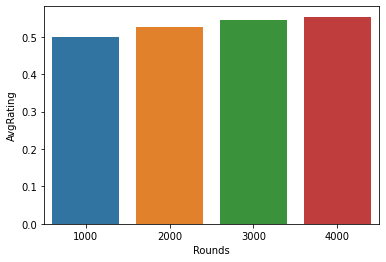

In [ ]:
data = Comparer(StandardDF, 5000, 1000)
sns.barplot(data=data, x="Rounds", y="AvgRating")

<Axes: xlabel='Rounds', ylabel='StdDevRating'>

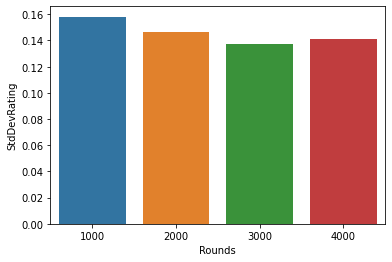

In [ ]:
sns.barplot(data=data, x = 'Rounds', y ='StdDevRating')

What is of interest to note in these two graphs is that as rounds played increases, the average rating of all players who have played more than that many rounds increases **AND** the standard deviation of the player's ratings decreases.

In [ ]:

new_col_df = pd.DataFrame({'Rounds Played': StoredRND, 'Earnings': Earnings, 'Rating': Rating})
# create a new dataframe with the StoredRND series, and Earnings series as new columns displaying rounds played per player, nationality of player, and earnings per player

FullClean = pd.concat([FullClean, new_col_df], axis=1)
# concatenate the FullClean dataframe and the new column dataframe along axis 1 (columns) in order to have raw data + characteristics of interest

FullClean.replace(',','', regex=True, inplace=True)
FullClean = FullClean.astype({'Earnings':'int'})
# Removes commas from Earnings and converts Earnings to integers to make it workable

FullClean

,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR,Rounds Played,Earnings,Rating
PlayerID,,,,,,,,,
crashies,201.8,1.07,0.74,133.2,0.16,0.00,6024.0,153650,0.623366
victor,220.6,1.04,0.72,140.2,0.20,0.01,6024.0,152650,0.643341
fns,174.1,0.86,0.68,114.7,0.12,-0.01,6314.0,151520,0.241605
marved,207.2,1.03,0.73,133.7,0.18,0.00,5455.0,150550,0.609270
yay,243.6,1.29,0.71,152.7,0.14,0.07,5124.0,142500,0.719109
...,...,...,...,...,...,...,...,...,...
dxn,178.7,0.87,0.66,120.0,0.12,0.00,1789.0,3300,0.223980
teddy,190.4,0.90,0.66,124.3,0.12,-0.02,1735.0,3293,0.241654
payen,181.4,0.89,0.68,120.0,0.17,-0.02,3985.0,3290,0.278734


In [ ]:
MLDF = FullClean.copy()
MLDF

# MLDF, standing for machine learning data frame is just used to differentiate from FullClean

,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR,Rounds Played,Earnings,Rating
PlayerID,,,,,,,,,
crashies,201.8,1.07,0.74,133.2,0.16,0.00,6024.0,153650,0.623366
victor,220.6,1.04,0.72,140.2,0.20,0.01,6024.0,152650,0.643341
fns,174.1,0.86,0.68,114.7,0.12,-0.01,6314.0,151520,0.241605
marved,207.2,1.03,0.73,133.7,0.18,0.00,5455.0,150550,0.609270
yay,243.6,1.29,0.71,152.7,0.14,0.07,5124.0,142500,0.719109
...,...,...,...,...,...,...,...,...,...
dxn,178.7,0.87,0.66,120.0,0.12,0.00,1789.0,3300,0.223980
teddy,190.4,0.90,0.66,124.3,0.12,-0.02,1735.0,3293,0.241654
payen,181.4,0.89,0.68,120.0,0.17,-0.02,3985.0,3290,0.278734


In [ ]:
from sklearn.cluster import KMeans
def Cluster(MLDF):
  clu = KMeans(n_clusters=3, random_state=0)
  clu.fit(MLDF)
  FinalMLDF = MLDF.copy()
  FinalMLDF['Cluster'] = clu.labels_
  return FinalMLDF.groupby('Cluster').mean()

# KMeans clustering, clusters = 3, is applied here in order to determine if there is some commonality/common factor amongst high earners vs low earners, or what is a noticable difference.
# The results indicate that people who do earn more deserve it, as they are performing and on average, are just better players so they deserve the money, which means that people saying "boosted" are for the most part, just haters.

In [ ]:
onekRND = Cluster(MLDF)
twokRND = Cluster(MLDF[MLDF['Rounds Played'] > 2500])
threekRND = Cluster(MLDF[MLDF['Rounds Played'] > 4000])
onekRND
twokRND
threekRND

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR,Rounds Played,Earnings,Rating
Cluster,,,,,,,,,
0,202.951393,0.995696,0.703983,131.592758,0.145975,-0.000251,2920.220056,8461.986072,0.477212
1,214.704545,1.119091,0.729545,136.954545,0.163864,0.013182,4673.250000,104380.295455,0.639279
2,207.836364,1.061157,0.721157,134.304959,0.153471,0.006281,3702.520661,38016.677686,0.572154


,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR,Rounds Played,Earnings,Rating
Cluster,,,,,,,,,
0,206.198191,1.017235,0.708605,133.515504,0.148656,0.002791,3953.405685,10678.581395,0.512450
1,213.407317,1.112439,0.729512,136.163415,0.162683,0.011951,4823.512195,105576.000000,0.631425
2,210.456977,1.073721,0.724186,135.563953,0.157093,0.007326,4094.558140,40854.046512,0.594152


,ACS,K:D,KAST,ADR,CL%,(FK-FD)PR,Rounds Played,Earnings,Rating
Cluster,,,,,,,,,
0,206.479775,1.031629,0.713708,133.74382,0.148596,0.005112,5136.848315,13890.370787,0.534915
1,215.590000,1.114500,0.727500,137.74000,0.160000,0.015000,5276.550000,118356.150000,0.637140
2,210.855882,1.070882,0.727353,135.65000,0.157941,0.005588,4914.500000,59678.970588,0.601744


Above, KMeans clustering was applied on the raw data set to find patterns, and more specifically, KMeans clustering was applied on the raw data for all values where rounds played were above 1000, 2500, and 4000.

What was interesting to note is that as rounds played increased, the ACS, KD and KAST increased for the two groups with lower earnings, but in terms of the group of greatest earnings, their stats did change as much. This indicates that players who have played more rounds are better players overall and tend to earn more, which provides some evidence to the conclusion that those who earn more deserve to earn more, but further analysis on this data is provided in the accompanying report.